# The Graph Data Access


## TODO: Build dataset in one notebook and then store as cvs.


Rai mainnet data exploration.

Goals of this notebook are to obtain:
* Signals, states, event and sequences
* Volatility metrics
* ID perceived shocks (correlated with announcements)
* Signal for target price
* Signal for market price
* Error plot


https://thegraph.com/explorer/subgraph/reflexer-labs/rai-mainnet?query=Example%20query

In [1]:
# import libraries
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
url = 'https://api.thegraph.com/subgraphs/name/reflexer-labs/rai-mainnet'

## Hourly stats

In [2]:
query_header = '''
query {{
    hourlyStats(first: 1000, skip:{}) {{'''

query_tail = '''    
}
}'''

query_body = '''
 timestamp
    blockNumber
    redemptionPrice {
      id
      block
      redemptionRate
      value
      
    }
    marketPriceUsd
    marketPriceEth
    globalDebt
    erc20CoinTotalSupply
'''





n = 0
safes = []
while True:
    print(f'request {n+1}')
    query = query_header.format(n*1000) + query_body + query_tail
    r = requests.post(url, json = {'query':query})
    s = json.loads(r.content)['data']['hourlyStats']
    print(f'results {len(s)}')
    safes.extend(s)
    print(f'total {len(safes)}')
    n += 1
    if len(s) < 1000:
        break
        
hourlyStats = pd.DataFrame(safes)

request 1
results 438
total 438


In [3]:
hourlyStats

,blockNumber,erc20CoinTotalSupply,globalDebt,marketPriceEth,marketPriceUsd,redemptionPrice,timestamp
0,11857308,1988.440432971667032725,1988.577499489843641169436691184972,0.002589462210048543650949087456484599,4.670500166535429740591356399938391,"{'block': '11849022', 'id': '0xe313271188492c4...",1613338681
1,11860793,2788.440432971667032725,2788.617717345781163523077653358556,0.002481355746535171105569862943787003,4.377049344386119132419461918241039,"{'block': '11860755', 'id': '0x40066774f6fb7d3...",1613384616
2,11861040,2788.440432971667032725,2788.657935201718685876567866781341,0.002481355746535171105569862943787003,4.406833024856393396658172078078713,"{'block': '11861008', 'id': '0x0d551e2a2d55fa8...",1613387890
3,11861337,2788.440432971667032725,2788.657935201718685876567866781341,0.002481355746535171105569862943787003,4.419265710853707004204445293455575,"{'block': '11861237', 'id': '0x5c67dbb323db039...",1613392101
4,11861474,3048.440432971667032725,3048.645954953510904626288422086589,0.001768934955701819449591545208406114,3.194329891923853932595347583210722,"{'block': '11861237', 'id': '0x5c67dbb323db039...",1613394096
...,...,...,...,...,...,...,...
433,11978776,33222789.36018858261409694,34322970.96635140975999830452006136,0.002126843861621908482462209898498768,3.17635623357785544221801199501197,"{'block': '11978760', 'id': '0x1981af549eac837...",1614953632
434,11979063,33410789.36018858261409694,34511049.9353481452117916077407956,0.002125166190675278414148580714843354,3.213046821780856927338166030652592,"{'block': '11979009', 'id': '0xb911b716c34c9e1...",1614957260
435,11979317,33439572.016623289158978648,34534527.8827114697347015711621831,0.002119704902182828613835530682040837,3.165530645838027059250863625092046,"{'block': '11979087', 'id': '0x893a04411f5ca4e...",1614960411
436,11979581,33438880.67539028161943702,34533890.86287047785094816843310367,0.002124101557381986586506610968729412,3.105866243875370664681788812666969,"{'block': '11979332', 'id': '0xa45b1c88cbceecd...",1614963860


In [40]:
hourlyStats['redemptionPriceActual'] = hourlyStats.redemptionPrice.apply(lambda x: x['value'])

In [41]:
hourlyStats['erc20CoinTotalSupply'] = hourlyStats['erc20CoinTotalSupply'].astype(float)
hourlyStats['globalDebt'] = hourlyStats['globalDebt'].astype(float)
hourlyStats['blockNumber'] = hourlyStats['blockNumber'].astype(int)
hourlyStats['marketPriceEth'] = hourlyStats['marketPriceEth'].astype(float)
hourlyStats['marketPriceUsd'] = hourlyStats['marketPriceUsd'].astype(float)
hourlyStats['redemptionPriceActual'] = hourlyStats['redemptionPriceActual'].astype(float)

In [6]:
hourlyStats['error'] = hourlyStats['redemptionPriceActual'] - hourlyStats['marketPriceUsd']
hourlyStats['error_integral'] = hourlyStats['error'].cumsum()

In [42]:
hourlyStats.describe()

,blockNumber,erc20CoinTotalSupply,globalDebt,marketPriceEth,marketPriceUsd,redemptionPriceActual,error,error_integral,equilibriation_ki,target_rate,counterfactual_redemption_rate,redemptionRateActual
count,4.380000e+02,4.380000e+02,4.380000e+02,438.000000,438.000000,438.000000,438.000000,438.000000,4.380000e+02,4.380000e+02,4.380000e+02,4.380000e+02
mean,1.192043e+07,2.337377e+07,2.378798e+07,0.002045,3.395834,3.108476,-0.287357,-88.192550,-2.267559e-09,2.274229e-09,2.274229e-09,1.000000e+00
std,3.442448e+04,1.278764e+07,1.311496e+07,0.000330,0.560724,0.029243,0.552383,27.875856,1.226010e-08,1.227291e-08,1.227291e-08,1.641447e-08
min,1.185731e+07,1.988440e+03,1.988577e+03,0.001609,2.850455,3.043675,-4.915382,-125.862563,-2.000000e-07,-1.610909e-09,-1.610909e-09,9.999999e-01
25%,1.189089e+07,1.159266e+07,1.160019e+07,0.001810,3.197840,3.089315,-0.263622,-107.260199,-7.558536e-10,2.181368e-10,2.181368e-10,1.000000e+00
50%,1.192044e+07,2.806201e+07,2.823438e+07,0.002039,3.262972,3.114203,-0.166042,-94.822212,-3.471407e-10,3.503643e-10,3.503643e-10,1.000000e+00
75%,1.195004e+07,3.376783e+07,3.479788e+07,0.002136,3.380065,3.134394,-0.103800,-74.236761,-2.136288e-10,7.599442e-10,7.599442e-10,1.000000e+00
max,1.197986e+07,3.821451e+07,3.855603e+07,0.004474,8.055382,3.140000,0.289543,-1.530500,1.643361e-09,2.002268e-07,2.002268e-07,1.000000e+00


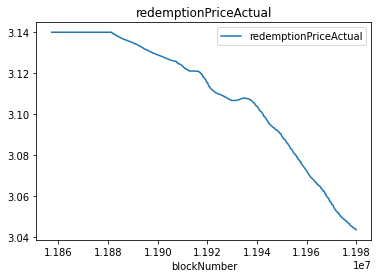

In [8]:
hourlyStats.plot(x='blockNumber',y='redemptionPriceActual',kind='line',title='redemptionPriceActual')

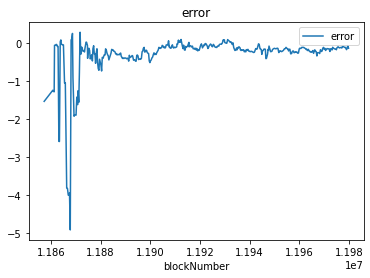

In [9]:
hourlyStats.plot(x='blockNumber',y='error',kind='line',title='error')

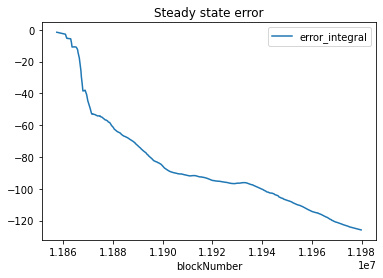

In [10]:
hourlyStats.plot(x='blockNumber',y='error_integral',kind='line',title='Steady state error')

## Error experimentation

#### Note: not taking into account control period

In [12]:
kp = 2e-7
#ki = (-kp * error)/(integral_error)
# computing at each time, what would the value of ki need to be such that the redemption price would be constant
hourlyStats['equilibriation_ki'] = (-kp * hourlyStats.error)/hourlyStats.error_integral

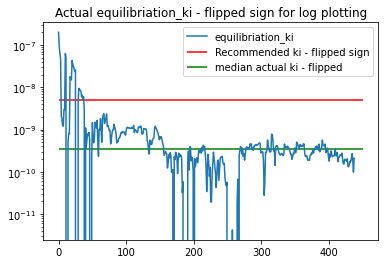

In [13]:
# todo iterate through labels and append negative
hourlyStats['equilibriation_ki'].apply(lambda x: -x).plot(logy = True,title='Actual equilibriation_ki - flipped sign for log plotting')
plt.hlines(5e-9, 0, 450, linestyles='solid', label='Recommended ki - flipped sign', color='r')
plt.hlines(-(hourlyStats['equilibriation_ki'].median()), 0, 450, linestyles='solid', label='median actual ki - flipped', color='g')
plt.legend(loc="upper right")

In [14]:
hourlyStats['equilibriation_ki'].median()

-3.471407227175208e-10

### Counterfactual if intergral control rate had been median the whole time

In [38]:
hourlyStats['counterfactual_redemption_rate'] = (kp * hourlyStats['error'] + hourlyStats['equilibriation_ki'].median())/ hourlyStats['error_integral']

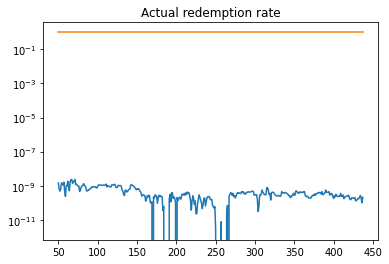

In [43]:
hourlyStats['counterfactual_redemption_rate'].iloc[50:].plot(logy = True,title='counterfactual_redemption_rate')
# let reflexer know this is wrong
hourlyStats['redemptionRateActual'].iloc[50:].plot(logy = True,title='Actual redemption rate')

In [53]:
query_header = '''
query {{
    redemptionPrices(first: 1000, skip:{}) {{'''

query_tail = '''    
}
}'''

query_body = '''
    block
    redemptionRate
'''





n = 0
safes = []
while True:
    print(f'request {n+1}')
    query = query_header.format(n*1000) + query_body + query_tail
    r = requests.post(url, json = {'query':query})
    s = json.loads(r.content)['data']['redemptionPrices']
    print(f'results {len(s)}')
    safes.extend(s)
    print(f'total {len(safes)}')
    n += 1
    if len(s) < 1000:
        break
        
redemptionPrices = pd.DataFrame(safes)
redemptionPrices['redemptionRateActual'] = redemptionPrices['redemptionRate'].astype(float)
redemptionPrices.head()


request 1
results 632
total 632


,block,redemptionRate,redemptionRateActual
0,11922844,0.999999980914941203165341994,1.0
1,11884264,0.999999982822810043588985278,1.0
2,11874001,0.999999999995517810637933345,1.0
3,11891875,0.999999985017029119334838116,1.0
4,11975500,0.999999971347925100728251499,1.0


# Todo spot check: take historical redemption rate and checking that it intergrates with the historical redemption price

In [54]:
hourlyStats.pd.concat(redemptionPrices, left_on='blockNumber', right_on='block')

ValueError: You are trying to merge on int64 and object columns. If you wish to proceed you should use pd.concat

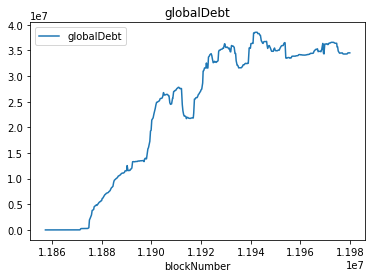

In [18]:
hourlyStats.plot(x='blockNumber',y='globalDebt',kind='line',title='globalDebt')

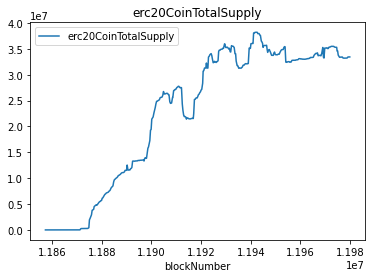

In [19]:
hourlyStats.plot(x='blockNumber',y='erc20CoinTotalSupply',kind='line',title='erc20CoinTotalSupply')

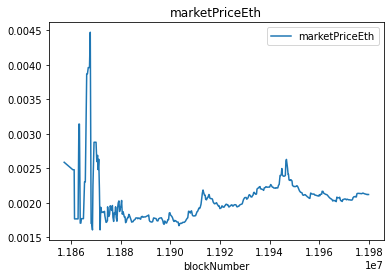

In [20]:
hourlyStats.plot(x='blockNumber',y='marketPriceEth',kind='line',title='marketPriceEth')

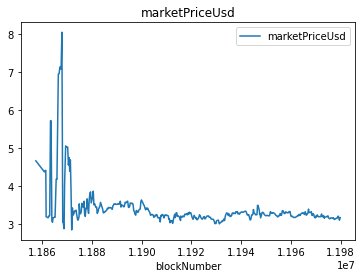

In [21]:
hourlyStats.plot(x='blockNumber',y='marketPriceUsd',kind='line',title='marketPriceUsd')

## Collateral Prices

In [22]:
query_header = '''
query {{
    collateralPrices(first: 1000, skip:{}) {{'''

query_tail = '''    
}
}'''

query_body = '''
    block #Block number
    timestamp # timestamp in seconds
    collateral {
      id
    } # collateral type
    safetyPrice # Price of the collateral divided by the redemptionPrice and then divided again by the safetyCRatio
    liquidationPrice # Price of the collateral divided by the redemptionPrice and then divided again by the liquidationCRatio
    value # Collateral price in denomination currency
        
'''


n = 0
safes = []
while True:
    print(f'request {n+1}')
    query = query_header.format(n*1000) + query_body + query_tail
    r = requests.post(url, json = {'query':query})
    s = json.loads(r.content)['data']['collateralPrices']
    print(f'results {len(s)}')
    safes.extend(s)
    print(f'total {len(safes)}')
    n += 1
    if len(s) < 1000:
        break
        
collateralPrices = pd.DataFrame(safes)

request 1
results 458
total 458


In [23]:
collateralPrices

,block,collateral,liquidationPrice,safetyPrice,timestamp,value
0,11884264,{'id': 'ETH-A'},425.756172923521735722928660667,425.756172923521735722928660667,1613696990,1937.02279208
1,11874001,{'id': 'ETH-A'},398.353039898207416477952051524,398.353039898207416477952051524,1613560127,1813.70012002
2,11891875,{'id': 'ETH-A'},434.715843378413871331796470963,434.715843378413871331796470963,1613797781,1975.3208183
3,11975500,{'id': 'ETH-A'},335.912883013434409782454915088,335.912883013434409782454915088,1614910207,1484.69954983
4,11932767,{'id': 'ETH-A'},326.363185145960454039746826731,326.363185145960454039746826731,1614341492,1470.40465188
...,...,...,...,...,...,...
453,11919704,{'id': 'ETH-A'},372.883282254963856729942433702,372.883282254963856729942433702,1614168007,1684.53514054
454,11875635,{'id': 'ETH-A'},398.377553435489366039735591017,398.377553435489366039735591017,1613581673,1813.81160303
455,11937659,{'id': 'ETH-A'},332.811169200323705181611468579,332.811169200323705181611468579,1614406185,1499.19739823
456,11947334,{'id': 'ETH-A'},302.894584806194622435262021494,302.894584806194622435262021494,1614535779,1358.29616077


In [24]:
collateralPrices['safetyPrice'] = collateralPrices['safetyPrice'].astype(float)
collateralPrices['liquidationPrice'] = collateralPrices['liquidationPrice'].astype(float)
collateralPrices['collateralPrice'] = collateralPrices['value'].astype(float)

In [25]:
collateralPrices.describe()

,liquidationPrice,safetyPrice,collateralPrice
count,458.000000,458.000000,458.000000
mean,370.158901,370.158901,1669.109175
std,39.289837,39.289837,188.196883
min,296.159935,296.159935,1328.192602
25%,337.195496,337.195496,1512.256462
50%,359.564047,359.564047,1607.513681
75%,400.297637,400.297637,1822.555142
max,447.572524,447.572524,2032.578356


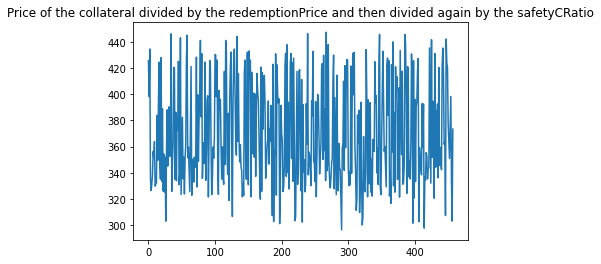

In [26]:
collateralPrices['safetyPrice'].plot(title='Price of the collateral divided by the redemptionPrice and then divided again by the safetyCRatio')         

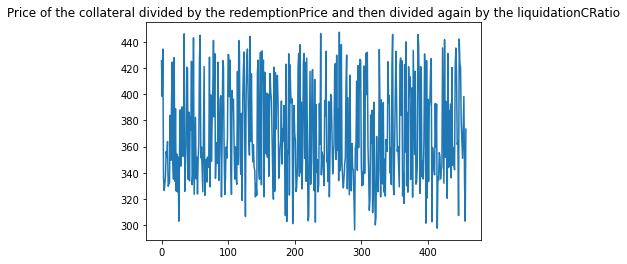

In [27]:
collateralPrices['liquidationPrice'].plot(title='Price of the collateral divided by the redemptionPrice and then divided again by the liquidationCRatio')

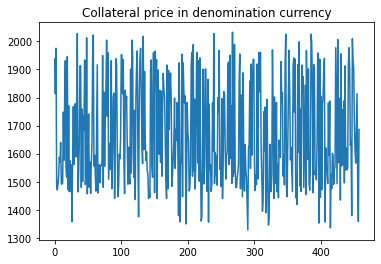

In [28]:
collateralPrices['collateralPrice'].plot(title='Collateral price in denomination currency')

## Safes

In [29]:
query_header = '''
query {{
    safes(first: 1000, skip:{}) {{'''

query_tail = '''    
}
}'''

query_body = '''
    id # Safe ID if this Safe was created through the Safe Manager (GebSafeManager)
    collateral #Outstanding Safe debt 
    debt # Amount of collateral locked in the Safe
    owner {
        id
        safes{
            id
        }
    }
    createdAt # Block number at which this Safe was opened

'''


n = 0
safes = []
while True:
    print(f'request {n+1}')
    query = query_header.format(n*1000) + query_body + query_tail
    r = requests.post(url, json = {'query':query})
    s = json.loads(r.content)['data']['safes']
    print(f'results {len(s)}')
    safes.extend(s)
    print(f'total {len(safes)}')
    n += 1
    if len(s) < 1000:
        break
        
safes = pd.DataFrame(safes)

request 1
results 1000
total 1000
request 2
results 364
total 1364


In [30]:
safes

,collateral,createdAt,debt,id,owner
0,0,1614276509,0,0x004f347f017acd2fa14fa7fe7414216cc00f8ac1-ETH-A,{'id': '0xd912c21ca7c215594ce55de8080a8cd6b7a0...
1,5.5,1613944193,1499.326422082953853423,0x0082d2052d608c46b74387dd548e99c615ef1e4c-ETH-A,{'id': '0xf33e5fd85a5905380c5f1b0ae444bb995287...
2,4,1614937613,799.142093799608254196,0x0092eb3f04319f7ef269f71f3dda2eda5efe438b-ETH-A,{'id': '0x0b5a3054e7d7c25c23ee8b7fd7cba3d2660b...
3,9,1613695776,1799.518124064741151231,0x00c314a1bfac72ee0656078a6664170fa0436110-ETH-A,{'id': '0x24d02e64d4a2580d570666546ac937adab2b...
4,0,1613944228,0,0x00cc1e026997f79191825efba6b63302d7e5e706-ETH-A,{'id': '0x4268560e1fd35f4006af49dbfb8db2edb218...
...,...,...,...,...,...
1359,0,1613961627,0,0xff6e9c4d50de3c4742c1ebd8a3b0746a602d998a-ETH-A,{'id': '0x12d39b43fbeccdeca8e31b6ae7c0f729d407...
1360,6,1613976307,1199.436950086718937351,0xff7fedfd85f861a61d95de9e3c83eaf4e06de5cc-ETH-A,{'id': '0x4d30a3cd1c738cf64101e699bb19f4f2d96d...
1361,91,1613665650,23049.268170354741860368,0xff9b5fd13b60f1e7111bb864c7b561aaadfead2a-ETH-A,{'id': '0x6ddbfa02a80ab01d0b31b6cafe18ad758f7e...
1362,9,1613649838,1999.471437164020345288,0xffdb87ebd534f67da7aefa8ad05aeb6de27b241d-ETH-A,{'id': '0xee779e4b3e7b11454ed80cfe12cf48ee3ff4...


In [31]:
safes['createdAt'] = safes['createdAt'].astype(float)
safes['debt'] = safes['debt'].astype(float)

In [32]:
safes.describe()

,createdAt,debt
count,1.364000e+03,1.364000e+03
mean,1.613947e+09,2.461525e+04
std,3.375500e+05,1.550503e+05
min,1.613230e+09,0.000000e+00
25%,1.613688e+09,0.000000e+00
50%,1.613891e+09,7.992934e+02
75%,1.614162e+09,2.243823e+03
max,1.614968e+09,2.407812e+06


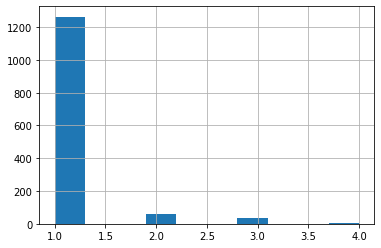

In [33]:
safes.owner.apply(lambda x: len([d['id'] for d in x['safes'] ])).hist()

In [34]:
safes.debt = safes.debt.apply(float)
safes.collateral = safes.collateral.apply(float)
safes['debt_ratio'] = safes.debt/safes.collateral 

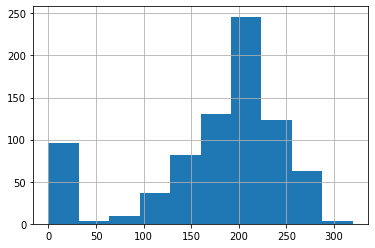

In [35]:
safes.debt_ratio.hist()

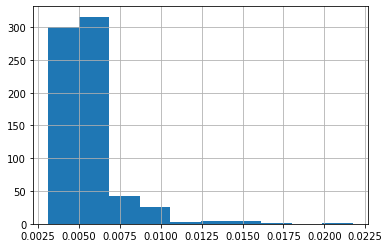

In [36]:
safes[safes.debt_ratio>0].debt_ratio.apply(lambda x :1/x).hist()

## Conclusion

Using The Graph, a lot of data about the Rai system can be obtained for analyzing the health of the system. With some data manipulation, these data streams could be intergrated into the Rai cadCAD model to turn it into a true decision support system.